In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
import cv2
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [11]:
image=get_image('provacolor3.png')
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [12]:

from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 50)
labels = clf.fit_predict(modified_image)

[array([150.40463918, 150.40463918, 150.40463918]),
 array([91.50619278, 91.50619278, 91.50619278]),
 array([105.02115762, 105.02115762, 105.02115762]),
 array([137.94686427, 137.94686427, 137.94686427]),
 array([128.4936756, 128.4936756, 128.4936756]),
 array([42.50088121, 42.50088121, 42.50088121]),
 array([93.99152848, 93.99152848, 93.99152848]),
 array([144.0035454, 144.0035454, 144.0035454]),
 array([38.17483541, 38.17483541, 38.17483541]),
 array([77.01165223, 77.01165223, 77.01165223]),
 array([112.49950956, 112.49950956, 112.49950956]),
 array([117.98183811, 117.98183811, 117.98183811]),
 array([175.29784917, 175.29784917, 175.29784917]),
 array([120.51263206, 120.51263206, 120.51263206]),
 array([107.49874515, 107.49874515, 107.49874515]),
 array([63.62973943, 63.62973943, 63.62973943]),
 array([188.46586599, 188.46586599, 188.46586599]),
 array([71.50346771, 71.50346771, 71.50346771]),
 array([130.49034826, 130.49034826, 130.49034826]),
 array([85.98857048, 85.98857048, 85.98

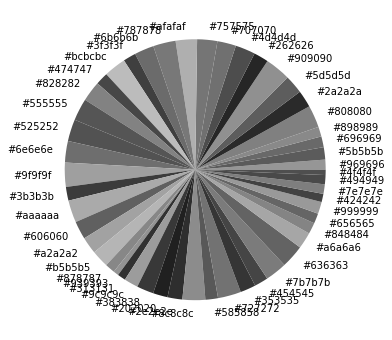

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

rgb_colors


In [14]:
import numpy as np
colorsorted=np.sort(rgb_colors,axis=None)
colorsorted

array([ 32.3787588 ,  32.3787588 ,  32.3787588 ,  38.17483541,
        38.17483541,  38.17483541,  42.50088121,  42.50088121,
        42.50088121,  46.0238193 ,  46.0238193 ,  46.0238193 ,
        49.52204437,  49.52204437,  49.52204437,  53.04749253,
        53.04749253,  53.04749253,  56.02340936,  56.02340936,
        56.02340936,  59.55135025,  59.55135025,  59.55135025,
        63.62973943,  63.62973943,  63.62973943,  66.53020298,
        66.53020298,  66.53020298,  69.01766836,  69.01766836,
        69.01766836,  71.50346771,  71.50346771,  71.50346771,
        73.98924575,  73.98924575,  73.98924575,  77.01165223,
        77.01165223,  77.01165223,  79.98881009,  79.98881009,
        79.98881009,  82.96765589,  82.96765589,  82.96765589,
        85.98857048,  85.98857048,  85.98857048,  88.98966942,
        88.98966942,  88.98966942,  91.50619278,  91.50619278,
        91.50619278,  93.99152848,  93.99152848,  93.99152848,
        96.48243993,  96.48243993,  96.48243993,  99.01

In [15]:
import PIL.Image as Image
import numpy as np

im = Image.open('provacolor3.png')
im = im.convert('RGBA')

data = np.array(im)   # "data" is a height x width x 4 numpy array
red, green, blue, alpha = data.T # Temporarily unpack the bands for readability
i=0
# Replace white with red... (leaves alpha values alone...)
while i < 119:
    print(colorsorted[i])
    print(colorsorted[i+1])
    print(colorsorted[i+2])
    print('ciao')


    white_areas = (red == int(colorsorted[i])) & (blue == int(colorsorted[i + 1])) & (green == int(colorsorted[i + 2]))
    data[..., :-1][white_areas.T] = (0, 255, 0)  # Transpose back needed
    i = i + 2

im2 = Image.fromarray(data)
im2.show()

32.37875879718527
32.37875879718527
32.37875879718527
ciao
32.37875879718527
38.17483540599885
38.17483540599885
ciao
38.17483540599885
38.17483540599885
42.50088121254876
ciao
42.50088121254876
42.50088121254876
42.50088121254876
ciao
42.50088121254876
46.02381930184828
46.02381930184828
ciao
46.02381930184828
46.02381930184828
49.52204436955943
ciao
49.52204436955943
49.52204436955943
49.52204436955943
ciao
49.52204436955943
53.04749252739974
53.04749252739974
ciao
53.04749252739974
53.04749252739974
56.02340936374576
ciao
56.02340936374576
56.02340936374576
56.02340936374576
ciao
56.02340936374576
59.55135024549954
59.55135024549954
ciao
59.55135024549954
59.55135024549954
63.629739428928495
ciao
63.629739428928495
63.629739428928495
63.629739428928495
ciao
63.629739428928495
66.53020298361483
66.53020298361483
ciao
66.53020298361483
66.53020298361483
69.017668356264
ciao
69.017668356264
69.017668356264
69.017668356264
ciao
69.017668356264
71.503467706979
71.503467706979
ciao
71.503

In [16]:

    white_areas = (red == int(colorsorted[i])) & (blue == int(colorsorted[i+1])) & (green == int(colorsorted[i+2]))
    data[..., :-1][white_areas.T] = (255, 0, 0) # Transpose back needed
    i=i+3

In [17]:

im2 = Image.fromarray(data)
im2.show()